In [7]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from pathlib import Path

In [8]:
# Directories
clorofila_drty   = Path(".")/"rasterData_chlorophyll-a"
temperature_drty = Path(".")/"rasterData_sea_temperature"

In [20]:
temperature_drty

PosixPath('rasterData_sea_temperature')

In [26]:
files = os.listdir("./" + str(temperature_drty))
[ files[i] for i in range(0,11) if files[i][-len("TIFF"):] == "TIFF" ]

['MYD28M_2021-06-01_gs_720x360.TIFF',
 'MYD28M_2021-08-01_gs_720x360.TIFF',
 'MYD28M_2021-12-01_gs_720x360.TIFF',
 'MYD28M_2021-01-01_gs_720x360.TIFF',
 'MYD28M_2021-10-01_gs_720x360.TIFF',
 'MYD28M_2021-11-01_gs_720x360.TIFF',
 'MYD28M_2021-09-01_gs_720x360.TIFF',
 'MYD28M_2021-04-01_gs_720x360.TIFF',
 'MYD28M_2021-02-01_gs_720x360.TIFF',
 'MYD28M_2021-05-01_gs_720x360.TIFF',
 'MYD28M_2021-07-01_gs_720x360.TIFF']

In [78]:
# Creating my function
def drty2xr(directory, filetype="tif"):
    directory = str(directory)
    directory = "./" + directory
    
    # Listing files
    files = os.listdir(directory)
    files = [ files[i] for i in range(0,11) if files[i][-len(filetype):] == filetype ]
    
    # Opening files and stacking them
    for file in files:
        if file == files[0]: 
            out_xr = xr.open_dataarray(directory+"/"+files[0], engine="rasterio")
        else: 
            temp_xr = xr.open_dataarray(directory+"/"+file, engine="rasterio")
            out_xr = xr.concat([out_xr, temp_xr], dim='band')
        
    return(out_xr)

In [79]:
temp_xr = drty2xr(temperature_drty, filetype="TIFF")
print(temp_xr)

<xarray.DataArray 'band_data' (band: 11, y: 360, x: 720)>
array([[[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]],

       [[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [ 18.,  18.,  18., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]],

       [[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
...
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 

In [80]:
# Creating a dataset
temp_ds = temp_xr.to_dataset(dim='band')
print(temp_ds)

<xarray.Dataset>
Dimensions:                                  (y: 360, x: 720)
Coordinates:
  * x                                        (x) float64 -179.8 -179.2 ... 179.8
  * y                                        (y) float64 89.75 89.25 ... -89.75
    spatial_ref                              int64 0
Data variables:
    1                                        (y, x) float32 255.0 ... 255.0
    layer_MYD28M_2021-08-01_gs_720x360.TIFF  (y, x) float32 255.0 ... 255.0
    layer_MYD28M_2021-12-01_gs_720x360.TIFF  (y, x) float32 255.0 ... 255.0
    layer_MYD28M_2021-01-01_gs_720x360.TIFF  (y, x) float32 255.0 ... 255.0
    layer_MYD28M_2021-10-01_gs_720x360.TIFF  (y, x) float32 255.0 ... 255.0
    layer_MYD28M_2021-11-01_gs_720x360.TIFF  (y, x) float32 255.0 ... 255.0
    layer_MYD28M_2021-09-01_gs_720x360.TIFF  (y, x) float32 255.0 ... 255.0
    layer_MYD28M_2021-04-01_gs_720x360.TIFF  (y, x) float32 255.0 ... 255.0
    layer_MYD28M_2021-02-01_gs_720x360.TIFF  (y, x) float32 255.0 ... 

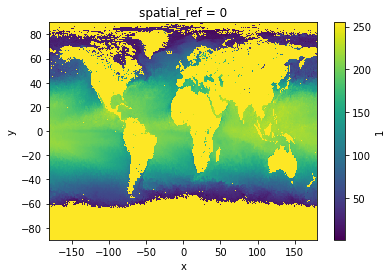

In [81]:
# Plotting
temp_ds[1].plot()